### Problem Statement
Fatalities due to traffic delays of emergency vehicles such as ambulance & fire brigade is a huge problem. In daily life, we often see that emergency vehicles face difficulty in passing through traffic. The main goal of the competetion was to create a binary image classifier that could differentiate the non-emergency vehicales from emergency vehicles that can be an important component in traffic monitoring as well as self drive car systems as reaching on time to their destination is critical for these services. 

### Dataset
For this notebook, we’ll be using the [“Emergency vs Non-Emergency Vehicle Classification”](https://datahack.analyticsvidhya.com/contest/janatahack-computer-vision-hackathon/#ProblemStatemen) dataset hosted on Analytics Vidhya.

### Approach 
Used transfer learning with **ResNet101**.

This Notebook provide solution to Computer Vision Hackathon hosted by Analytics Vidhya.


In [ ]:
import pandas as pd
import numpy as np
import os.path
from keras.applications import ResNet50
from keras.applications import ResNet101
from keras.optimizers import Adam
import cv2
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving av_data.rar to av_data.rar


In [ ]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive('/content/av_data.rar').extractall('/content/sample_data/data/')



In [ ]:
pwd

'/content'

In [ ]:
from keras.applications import ResNet152

In [ ]:
train = pd.read_csv('/content/sample_data/data/av_data/train.csv')
test = pd.read_csv('/content/sample_data/data/av_data/test_vc2kHdQ.csv')
train.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [ ]:
print("training data size is : ",train.shape[0])
print("testing data size is  : ",test.shape[0])

training data size is :  1646
testing data size is  :  706


In [ ]:
from keras.preprocessing import image
img = image.load_img(str('/content/sample_data/data/av_data/images/'+train['image_names'][0]))
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FCF6961DEB8>


In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img(str('/content/sample_data/data/av_data/images/'+train['image_names'][i]), target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
x_train = np.array(train_image)

100%|██████████| 1646/1646 [00:02<00:00, 599.16it/s]


In [ ]:
print(x_train.shape)

(1646, 224, 224, 3)


In [ ]:
from keras.utils import to_categorical
y=train['emergency_or_not'].values
print(y.shape)
y_train = to_categorical(y)

(1646,)


In [ ]:
print(y_train.shape)

(1646, 2)


In [ ]:
from keras import applications
from keras.models import Model
from keras import optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
base_model =   applications.ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [ ]:
## set model architechture 
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dropout(0.5))
add_model.add(Dense(512, activation='relu'))
add_model.add(Dropout(0.4))
add_model.add(Dense(256, activation='relu'))
add_model.add(Dropout(0.4))
add_model.add(Dense(y_train.shape[1], activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
batch_size = 5          
epochs = 20                  

train_datagen = ImageDataGenerator(
        rotation_range=30, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

train_datagen.fit(x_train)

In [ ]:
early_stopping = EarlyStopping(min_delta = 0.001, mode = 'max', monitor='acc', patience = 2)
callback = [early_stopping]

In [ ]:
history = model.fit_generator(
    train_datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=x_train.shape[0] // batch_size,
    epochs=epochs,
    callbacks = callback
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
329/329 [==============================] - 112s 341ms/step - loss: 0.9089 - accuracy: 0.7605
Epoch 2/20
329/329 [==============================] - 111s 339ms/step - loss: 0.4825 - accuracy: 0.8452
Epoch 3/20
329/329 [==============================] - 111s 339ms/step - loss: 0.3208 - accuracy: 0.8830
Epoch 4/20
329/329 [==============================] - 111s 339ms/step - loss: 0.2776 - accuracy: 0.9049
Epoch 5/20
329/329 [==============================] - 111s 339ms/step - loss: 0.2262 - accuracy: 0.9177
Epoch 6/20
329/329 [==============================] - 111s 338ms/step - loss: 0.2214 - accuracy: 0.9238
Epoch 7/20
329/329 [==============================] - 111s 338ms/step - loss: 0.1883 - accuracy: 0.9232
Epoch 8/20
329/329 [==============================] - 111s 338ms/step - loss: 0.1653 - accuracy: 0.9391
Epoch 9/20
329/329 [==============================] - 111s 338ms/step - loss: 0.1712 - accur

In [ ]:
model.save_weights("try1.h5")

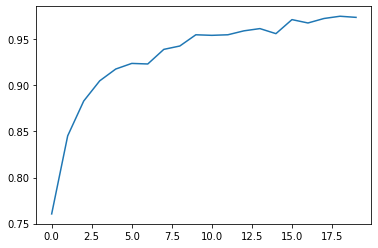

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])

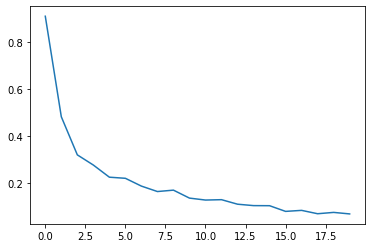

In [ ]:
plt.plot(history.history['loss'])

In [ ]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img(str('/content/sample_data/data/av_data/images/'+test['image_names'][i]), target_size=(224,224,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
x_test = np.array(test_image)

100%|██████████| 706/706 [00:01<00:00, 652.82it/s]


In [ ]:
predictions = model.predict(x_test)
print(predictions)

[[9.9961120e-01 3.8884691e-04]
 [6.8267097e-04 9.9931729e-01]
 [9.9999940e-01 6.1885345e-07]
 ...
 [2.7924070e-06 9.9999726e-01]
 [9.9996150e-01 3.8469567e-05]
 [9.9847919e-01 1.5207741e-03]]


In [ ]:
# get labels
predictions = np.argmax(predictions, axis=1)
print(predictions)

[0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0
 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1
 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1
 0 0 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0
 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0
 1 0 0 0 1 0 1 0 1 0 1 1 

In [ ]:

sample = pd.read_csv('/content/sample_data/data/av_data/sample_submission_yxjOnvz.csv')
sample.head()
sample['emergency_or_not'] = predictions
sample.to_csv('/content/sample_data/data/av_data/sample_cnn.csv', header=True, index=False) 

In [ ]:
print(type(x_test))

<class 'numpy.ndarray'>


In [ ]:
s = pd.read_csv('/content/sample_data/data/av_data/sample_cnn.csv')
s.head()

,image_names,emergency_or_not
0,1960.jpg,0
1,668.jpg,1
2,2082.jpg,0
3,808.jpg,1
4,1907.jpg,0


In [ ]:
#pedictiing given image
my_number = x_test[0]

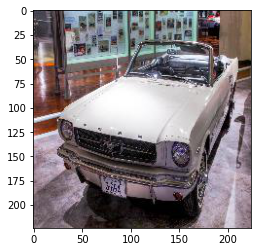

In [ ]:
plt.imshow(my_number.reshape(224,224,3))

In [ ]:
a=model.predict(my_number.reshape(1,224,224,3))
a

array([[9.9961120e-01, 3.8884082e-04]], dtype=float32)

In [ ]:
predictions = np.argmax(a, axis=1)
predictions#0 non-emergency

array([0])